# 首先， 我先把加權指數三年的股價取出

In [1]:
import numpy as np
import pandas as pd

filename = r'C:\Users\User\Desktop\大數據與商業分析\mid tern\stock_data.xlsx'

In [2]:
df = pd.read_excel(	filename,
					sheet_name = u'上市2018' ,
					# name = ['證券代碼', u'年月日', u'開盤價(元)', u'最高價(元)', u'最低價(元)', u'收盤價(元)', u'成交量(千股)', u'成交值(千元)', u'成交筆數(筆)', u'流通在外股數(千股)', u'本益比-TSE', u'股價淨值比-TSE']
					)

In [3]:
df.tail()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE
237715,TWN50 台灣50指數,2018-01-02,8005.89,8032.98,7992.24,8032.98,425954,25774318,155272,366032503,NaN,NaN
237716,Y5555 不含電子,2018-01-02,14489.10,14537.98,14480.36,14537.98,1211378,30229644,361184,461103865,NaN,NaN
237717,Y8886 未含金電,2018-01-02,12434.66,12469.76,12422.58,12469.76,1021511,26477883,308295,253560361,NaN,NaN
237718,Y8888 不含金融,2018-01-02,9056.46,9094.86,9042.69,9094.86,2211971,91908946,830886,498148370,NaN,NaN
237719,Y9999 加權指數,2018-01-02,10664.82,10710.73,10650.77,10710.73,5393557,104485978,1010745,705691874,NaN,NaN


In [4]:
## 把row index換成證券代碼
df.set_index(u'證券代碼', inplace = True)
## 找出 df裡面只屬於加權指數的，並只留下日期跟收盤價
market = df.filter(like = '9999', axis = 0)
market = market.filter(items = [u'年月日', u'收盤價(元)'], axis = 1)

## 做同樣的事情即可能到三年的加權指數股價

In [7]:
df2017 = pd.read_excel(	filename,
					sheet_name = u'上市2017' ,
					encoding = 'big5', 
					index_col = 0, 
					usecols   = [u'證券代碼', u'年月日', u'收盤價(元)']
					)
df2016 = pd.read_excel(	filename,
					sheet_name = u'上市2016' ,
					encoding = 'big5', 
					index_col = 0, 
					usecols   = [u'證券代碼', u'年月日', u'收盤價(元)']
					)

In [8]:
market2017 = df2017.filter(like = '9999', axis = 0)
market2017 = market2017.filter(items = [u'年月日', u'收盤價(元)'], axis = 1)

market2016 = df2016.filter(like = '9999', axis = 0)
market2016 = market2016.filter(items = [u'年月日', u'收盤價(元)'], axis = 1)
market2018 = market
final_market = pd.concat([market2016, market2017, market2018])
final_market = final_market.sort_values(by=[u'年月日'])
final_market

In [9]:
final_market.to_csv('market_price.csv', encoding = 'big5')

# 計算加權指數的1日至5日報酬率，計算5日MA

In [10]:
#函數定義
def moving_average(lst): 
    return sum(lst) / len(lst) 
def stock_return(price_now, price_past):
    return (price_now-price_past) / price_past

In [11]:
import csv 
from datetime import datetime
file = open('market_price.csv', 'r')
reader = csv.DictReader(file)
five_day_price = []

data_list = []

for a_row in reader:
        tem_dict = dict()
        
        date = datetime.strptime( a_row[u'年月日'], "%Y-%m-%d")
        price = float(a_row[u'收盤價(元)'] )
        five_day_price.append( price )
    
        
        if len(five_day_price) == 6:
            #計算1日到過去5日報酬
            returns = []
            for i in range(5):
                returns.append(stock_return(price, five_day_price[i] )  )
             
            #計算MA
            five_day_price = five_day_price[1:] #保留5個
            five_MA = moving_average(five_day_price)


            #存成dictionary
            tem_dict['name'] = 'Y9999 加權指數'
            tem_dict['date'] = date
            tem_dict['price'] = price
            tem_dict['5MA'] = five_MA
            tem_dict['1日報酬'] = returns[4]
            tem_dict['2日報酬'] = returns[3]
            tem_dict['3日報酬'] = returns[2]
            tem_dict['4日報酬'] = returns[1]
            tem_dict['5日報酬'] = returns[0]
        

            data_list.append(tem_dict)

In [12]:
import pandas as pd
df = pd.DataFrame(data_list)[['name', 'date', 'price', '5MA', u'1日報酬',  u'2日報酬',  u'3日報酬',  u'4日報酬',  u'5日報酬',]]

In [13]:
df.to_csv('market_ready.csv', encoding = 'big5')

In [14]:
df.describe()

,price,5MA,1日報酬,2日報酬,3日報酬,4日報酬,5日報酬
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,9880.720902,9876.040180,0.000317,0.000628,0.000894,0.001154,0.001424
std,905.735420,908.727906,0.007962,0.011095,0.013683,0.015956,0.017963
min,7664.010000,7757.074000,-0.063125,-0.064912,-0.067763,-0.085158,-0.097371
25%,9160.262500,9148.076500,-0.003568,-0.005548,-0.006202,-0.007503,-0.008066
50%,9943.290000,9936.427000,0.000767,0.001313,0.001496,0.002094,0.002261
75%,10711.967500,10725.483000,0.005028,0.008189,0.009378,0.011360,0.012071
max,11253.110000,11190.706000,0.028975,0.033448,0.039941,0.041011,0.044829


# 清洗資料

In [15]:
df111 = pd.read_csv(r'C:\Users\User\Desktop\大數據與商業分析\mid tern\news.csv', encoding = 'big5')
df111 = df111[df111['content']!=u'本日資訊傳送完畢']
mask = df111['content'].str.contains(u'如何在Yahoo股市APP看直播', regex=False, na = False)
df111 = df111[~mask]
mask = df111['content'].str.contains(u'獎號碼', regex=False, na = False)
df116 = df111[~mask]
mask = df116['content'].str.contains(u'威力彩', regex=False, na = False)
df117 = df116[~mask]
mask = df117['content'].str.contains(u'彩券', regex=False, na = False)
df118 = df117[~mask]
mask = df118['title'].str.contains(u'統一發票', regex=False, na = False)
df119 = df118[~mask]
mask = df119['title'].str.contains(u'頭獎', regex=False, na = False)
df120 = df119[~mask]
mask = df120['title'].str.contains(u'行事曆', regex=False, na = False)
df121 = df120[~mask]

In [17]:
del df111, df116, df117, df118, df119,df120

In [18]:
df_len = df121['content'].fillna('').apply(len)
df_len.describe()

count    245548.000000
mean        601.363994
std         499.259061
min           0.000000
25%         264.000000
50%         520.000000
75%         814.000000
max       16338.000000
Name: content, dtype: float64

In [21]:
df122 = df121[ df_len > 30 ]

## 經過以上步驟，我將重複的、關於彩票及發票的、關於行事曆、以及內容過少的新聞排除

In [22]:
df_final = df122.drop_duplicates(subset ='content')
df_final.describe()

,id,p_type,s_name,s_area_name,post_time,title,author,content,page_url
count,232514,232514,232514,232514,232514,232514,232499,232514,232514
unique,232514,1,1,2,135037,222873,11,232514,232514
top,1545093541189_N01,news,yahoo股市,最新財經新聞,2018/6/28 08:29:00,工商時報晨訊,時報資訊,MoneyDJ新聞 2018-07-20 13:46:35 記者 郭妍希 報導<BR>川普5...,https://tw.stock.yahoo.com/news/上櫃認購-售-權證8-17履...
freq,1,232514,232514,135083,40,488,68079,1,1


In [23]:
df_final.to_csv('news_ready.csv', encoding = 'big5')

# 清洗 bbs

In [24]:
df_bbs = pd.read_csv(r'C:\Users\User\Desktop\大數據與商業分析\mid tern\bbs.csv', encoding = 'utf-8')

In [25]:
mask = df_bbs['content'].str.contains(u'沒人開\n\n我來開\n\n大家賺錢\n\n--\n', regex=False, na = False)
df_bbs[mask]
df_bbs1 = df_bbs[~mask]

In [26]:
import re
def drop_new_lines(string):
    string = re.sub(r'\n', ' ', string)
    string = re.sub(r'(1.原文連結.*原文內容)', ' ', string)
    string = re.sub(' +', ' ', string)
    return string

In [27]:
dfbbs2 = df_bbs1['content'].fillna('').apply(drop_new_lines)
dfbbs3 = pd.merge(df_bbs1, dfbbs2, left_index=True, right_index=True, how='outer')

In [28]:
dfbbs_len = dfbbs3['content_y'].fillna('').apply(len)

In [29]:
dfbbs4 = dfbbs3[ dfbbs_len > 5 ].drop('content_x', axis = 1)
dfbbs_final = dfbbs4.drop_duplicates(subset ='content_y')
dfbbs_final['content_y'].describe()

count                                                 57930
unique                                                57930
top        ： 週四 (15 日) 美股道瓊指數大幅收漲 306.88 點，重新收復了 25000 點...
freq                                                      1
Name: content_y, dtype: object

In [30]:
dfbbs_final.to_csv( 'BBS_ready.csv', encoding = 'utf-8')

# 清洗 forum

In [31]:
df_forums = pd.read_csv(r'C:\Users\User\Desktop\大數據與商業分析\mid tern\forum.csv', encoding = 'utf-8')
mask = df_forums['content'].str.contains(u'[申請比特幣錢包]', regex=False, na = False)
df_forums1 = df_forums[~mask]
df_forums1_len = df_forums1['content'].fillna('').apply(len)
df_forums2 = df_forums1[ df_forums1_len > 15 ]
dfforum_final = df_forums2.drop_duplicates(subset ='content')
dfforum_final['content'].describe()

count                                        25562
unique                                       25562
top       請問<BR>原物料類股應該算是景氣循環股吧！<BR>那麼這類型的股票能買來存嗎?
freq                                             1
Name: content, dtype: object

In [32]:
dfforum_final.to_csv( 'forum_ready.csv', encoding = 'utf-8')

# 接著我對每個洗好的csv進行tf idf排序，選出每個文章列別各1000個keyword

## 使用程式碼 word_to_tf_idf.py

## 接著使用k-means.py 將每一類文章分群

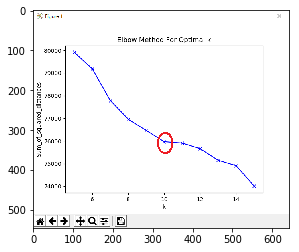

In [34]:
from PIL import Image
import matplotlib.pyplot as plt
img=Image.open(r'C:\Users\User\Documents\GitHub\Big_data_analytics\mid project\best k for bbs.bmp')
plt.figure("dog")
plt.imshow(img)
plt.show()
# 圖例 bbs 共分出10群

# 人工標記!! 將每一群都人工標記50~60篇 [看漲, 不相關, 看跌]

## 接著用人工標記的資料來預測剩下的未標記文章

## news

## 統整好的label 如下

In [2]:
import pandas as pd
new_label = pd.read_csv(r'C:\Users\User\cluster\news\news_only_label.csv')

In [17]:
tf_idf = pd.read_csv('news_1000_tf_idf.csv', encoding ='utf-8')

In [18]:
news = pd.read_csv(r'C:\Users\User\news_ready.csv', encoding ='big5')
id_df = news.loc[:, ['id', 'id2', ]]

In [5]:
res = pd.merge(id_df, new_label, on=['id'], how='outer')
res['label'] = res['label'].fillna('X')
res.columns = ['id2', 'id', 'label']
y = res.loc[:, ['id', 'label']]
y.head()

,id,label
0,1451580107540_N01,X
1,1451582807314_N01,X
2,1451584607515_N01,X
3,1451597207172_N01,X
4,1451599007463_N01,X


In [6]:
human_label_data_df = res[res['label'].isin([0,1,2])]
human_label_data_id = human_label_data_df['id'].tolist()

## 預測模型

In [7]:
X_labeled = tf_idf[ tf_idf['id'].isin(human_label_data_id)]
X_unlabeled = tf_idf[ ~tf_idf['id'].isin(human_label_data_id)]
print(X_labeled.shape, X_unlabeled.shape)

(660, 1001) (231854, 1001)


In [8]:
y_labeled = y[ y['id'].isin(human_label_data_id)]
y_unlabeled = y[ ~y['id'].isin(human_label_data_id)]
print(y_labeled.shape, y_unlabeled.shape)

(660, 2) (231854, 2)


In [9]:
import numpy as np
x_train = x_test = X_labeled.iloc[:, 1:]
y_train = y_test = y_labeled.iloc[:, 1:].values.tolist()

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy', n_estimators =10, random_state = 1, n_jobs = 2)

#fit
forest.fit(x_train,y_train)
print(forest.score(x_test, y_test))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


0.9818181818181818


In [10]:
y_pesudo_label = forest.predict(X_unlabeled.iloc[:, 1:])
y_unlabeled['label'] = y_pesudo_label

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# recursive training the RF model

In [11]:
X = X_labeled.append(X_unlabeled, ignore_index=True)
Y = y_labeled.append(y_unlabeled, ignore_index=True)

In [12]:
forest_list = []
max_score = 0
while True:
    x_train  = X.iloc[:, 1:]
    y_train  = Y.iloc[:, 1:].values.tolist()


    forest = RandomForestClassifier(criterion = 'entropy', n_estimators =10, random_state = 1, n_jobs = 4)

    #fit
    forest.fit(x_train,y_train)
    forest_list.append(forest)

    #score
    tem_score = forest.score(x_test, y_test)
    print(tem_score)
    
    if tem_score > max_score:
        max_score = tem_score
    
    else:
        break
        
    # update pesudo labeling
    y_unlabeled['label'] = forest.predict(X_unlabeled.iloc[:, 1:])
    Y = y_labeled.append(y_unlabeled, ignore_index=True)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.9878787878787879


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.9893939393939394


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.9863636363636363


In [13]:
# save the best model
from sklearn.externals import joblib
joblib.dump(forest_list[1], 'news_predict_model.pkl')

['news_predict_model.pkl']

In [24]:
Y.to_csv('news_labeled.csv', index = False)

## 標記bbs 

In [13]:
import pandas as pd
bbs_label = pd.read_csv(r'C:\Users\User\cluster\bbs\bbs_only_label.csv')

In [14]:
tf_idf = pd.read_csv(r'C:\Users\User\BBS_1000_tf_idf.csv', encoding ='utf-8')

In [15]:
id_df = tf_idf['id']
res = pd.merge(id_df, bbs_label, on=['id'], how='outer')

In [16]:
res['label'] = res['label'].fillna('X')
y = res
del res

In [17]:
human_label_data_df = y[y['label'].isin([0,1,2])]
human_label_data_id = human_label_data_df['id'].tolist()
len(human_label_data_id)

600

In [18]:
X_labeled = tf_idf[ tf_idf['id'].isin(human_label_data_id)]
X_unlabeled = tf_idf[ ~tf_idf['id'].isin(human_label_data_id)]
print(X_labeled.shape, X_unlabeled.shape)

(600, 1001) (57330, 1001)


In [19]:
y_labeled = y[ y['id'].isin(human_label_data_id)]
y_unlabeled = y[ ~y['id'].isin(human_label_data_id)]
print(y_labeled.shape, y_unlabeled.shape)

(600, 2) (57330, 2)


In [20]:
import numpy as np
        

x_train = x_test = X_labeled.iloc[:, 1:]
y_train = y_test = y_labeled.iloc[:, 1:].values.tolist()

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy', n_estimators =10, random_state = 1, n_jobs = 2)

#fit
forest.fit(x_train,y_train)

#score 
print(forest.score(x_test, y_test))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.9516666666666667


In [21]:
y_unlabeled['label'] =  forest.predict(X_unlabeled.iloc[:, 1:])

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# recursive training the RF model

In [22]:
X = X_labeled.append(X_unlabeled, ignore_index=True)
Y = y_labeled.append(y_unlabeled, ignore_index=True)
print(X.shape, Y.shape)

(57930, 1001) (57930, 2)


In [23]:
forest_list = []
max_score = 0
while True:
    x_train  = X.iloc[:, 1:]
    y_train  = Y.iloc[:, 1:].values.tolist()


    forest = RandomForestClassifier(criterion = 'entropy', n_estimators =10, random_state = 1, n_jobs = 4)

    #fit
    forest.fit(x_train,y_train)
    forest_list.append(forest)

    #score
    tem_score = forest.score(x_test, y_test)
    print(tem_score)
    
    if tem_score > max_score:
        max_score = tem_score
    
    else:
        break
        
    # update pesudo labeling
    y_unlabeled['label'] = forest.predict(X_unlabeled.iloc[:, 1:])
    Y = y_labeled.append(y_unlabeled, ignore_index=True)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.9533333333333334


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.9516666666666667


In [26]:
# save the best model
from sklearn.externals import joblib
joblib.dump(forest_list[0], 'bbs_predict_model.pkl')

['bbs_predict_model.pkl']

In [27]:
Y.to_csv('bbs_labeled.csv', index = False)

# 標記forum

In [56]:
import pandas as pd
label_df = pd.read_csv(r'C:\Users\User\cluster\forum\forum_only_label.csv')

In [57]:
tf_idf = pd.read_csv(r'C:\Users\User\forum_1000_tf_idf.csv', encoding ='utf-8')
id_df = tf_idf['id']
res = pd.merge(label_df, id_df, on=['id'], how='outer')


In [51]:
res['label'] = res['label'].fillna('X')
y = res
del res

human_label_data_df = y[y['label'].isin([0,1,2])]
human_label_data_id = human_label_data_df['id'].tolist()
len(human_label_data_id)

498

In [58]:
X_labeled = tf_idf[ tf_idf['id'].isin(human_label_data_id)]
X_unlabeled = tf_idf[ ~tf_idf['id'].isin(human_label_data_id)]
print(X_labeled.shape, X_unlabeled.shape)
y_labeled = y[ y['id'].isin(human_label_data_id)]
y_unlabeled = y[ ~y['id'].isin(human_label_data_id)]
print(y_labeled.shape, y_unlabeled.shape)

(498, 1001) (25064, 1001)
(498, 2) (25064, 2)


In [59]:
import numpy as np
        

x_train = x_test = X_labeled.iloc[:, 1:]
y_train = y_test = y_labeled.iloc[:, 1:].values.tolist()

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy', n_estimators =10, random_state = 1, n_jobs = 2)

#fit
forest.fit(x_train,y_train)

#score 
print(forest.score(x_test, y_test))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.9859437751004017


In [35]:
y_pesudo_label = forest.predict(X_unlabeled.iloc[:, 1:])
y_unlabeled['label'] = y_pesudo_label
X = X_labeled.append(X_unlabeled, ignore_index=True)
Y = y_labeled.append(y_unlabeled, ignore_index=True)
print(X.shape, Y.shape)

(25562, 1001) (25562, 2)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
forest_list = []
max_score = 0
while True:
    x_train  = X.iloc[:, 1:]
    y_train  = Y.iloc[:, 1:].values.tolist()


    forest = RandomForestClassifier(criterion = 'entropy', n_estimators =10, random_state = 1, n_jobs = 4)

    #fit
    forest.fit(x_train,y_train)
    forest_list.append(forest)

    #score
    tem_score = forest.score(x_test, y_test)
    print(tem_score)
    
    if tem_score > max_score:
        max_score = tem_score
    
    else:
        break
        
    # update pesudo labeling
    y_unlabeled['label'] = forest.predict(X_unlabeled.iloc[:, 1:])
    Y = y_labeled.append(y_unlabeled, ignore_index=True)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.9558232931726908


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.9598393574297188


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.9578313253012049


In [38]:
y_unlabeled['label'] = forest_list[-2].predict(X_unlabeled.iloc[:, 1:])
Y = y_labeled.append(y_unlabeled, ignore_index=True)
Y.to_csv('forum_labeled.csv', index = False)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
Y
df33 = pd.read_csv(r'C:\Users\User\Documents\GitHub\Big_data_analytics\mid project\data\labeled\forum_labeled.csv')
df34 =  pd.merge(df33, Y, on=['id'], how='outer')